In [1]:
import tensorflow as tf


In [13]:
import tensorflow.keras.datasets as datasets

In [37]:
NUM_WORDS = 10000

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(NUM_WORDS=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
word_index = datasets.imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
word_index.items()

In [21]:
for i, (key, index) in enumerate(word_index.items()):
    print(f'key:{key} --> index:{index}')
    if i == 20:
        break


key:fawn --> index:34701
key:tsukino --> index:52006
key:nunnery --> index:52007
key:sonja --> index:16816
key:vani --> index:63951
key:woods --> index:1408
key:spiders --> index:16115
key:hanging --> index:2345
key:woody --> index:2289
key:trawling --> index:52008
key:hold's --> index:52009
key:comically --> index:11307
key:localized --> index:40830
key:disobeying --> index:30568
key:'royale --> index:52010
key:harpo's --> index:40831
key:canet --> index:52011
key:aileen --> index:19313
key:acurately --> index:52012
key:diplomat's --> index:52013
key:rickman --> index:25242


In [23]:
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])

In [25]:
for i, (index, key) in enumerate(reverse_word_index.items()):
    print(f'index:{index} --> key:{key}')
    if i == 20:
        break

index:34701 --> key:fawn
index:52006 --> key:tsukino
index:52007 --> key:nunnery
index:16816 --> key:sonja
index:63951 --> key:vani
index:1408 --> key:woods
index:16115 --> key:spiders
index:2345 --> key:hanging
index:2289 --> key:woody
index:52008 --> key:trawling
index:52009 --> key:hold's
index:11307 --> key:comically
index:40830 --> key:localized
index:30568 --> key:disobeying
index:52010 --> key:'royale
index:40831 --> key:harpo's
index:52011 --> key:canet
index:19313 --> key:aileen
index:52012 --> key:acurately
index:52013 --> key:diplomat's
index:25242 --> key:rickman


In [29]:
sample = x_train[0]

In [30]:
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in sample])

In [31]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [34]:
len(sample)

218

In [35]:
len(x_train[1])

189

In [36]:
import numpy as np

In [44]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
def vectorize_sequences(sequences, dimension=NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.0
        
    return results    

In [45]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [50]:
import matplotlib.pyplot as plt

In [49]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [52]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [53]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [84]:
model = tf.keras.Sequential([    
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [85]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]


In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss', #'val_loss',
        patience=2
    ),
    tf.keras.callbacks.TensorBoard()
]

In [86]:
history = model.fit(x_train_partial, y_train_partial, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val), callbacks=callbacks)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.6231 - loss: 0.6453 - val_accuracy: 0.7797 - val_loss: 0.4605
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.8312 - loss: 0.3874 - val_accuracy: 0.8799 - val_loss: 0.3063


In [87]:
history_dict = history.history


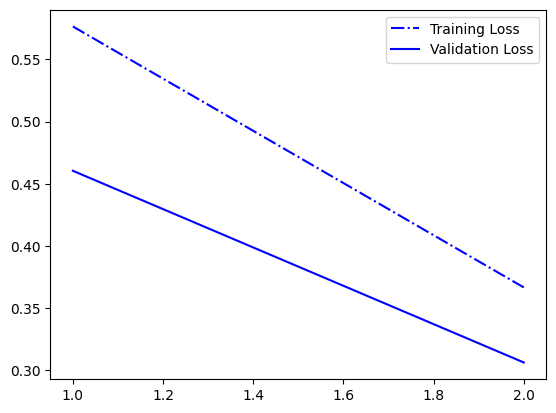

In [88]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, len(loss_values) + 1)

plt.plot(epoches, loss_values, 'b-.', label='Training Loss')
plt.plot(epoches, val_loss_values, 'b-', label='Validation Loss')
plt.legend()
plt.show()

In [82]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.3022


In [83]:
results

[0.30111634731292725, 0.8800399899482727]